# Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine
https://www.kaggle.com/dalpozz/creditcardfraud

In [55]:
# Import dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas
import os
import seaborn
import numpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import neighbors, linear_model

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Useful directories for loading
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
raw_data_dir = os.path.join(os.getcwd(), os.pardir, 'data', 'raw')

## Step 1
Load dataset from data location and identify basic structures 

In [3]:
# Define data file name and load data into a dataframe
file_name = 'creditcard.csv'
data_file_path = os.path.join(raw_data_dir, file_name)
raw_data_df = pandas.read_csv(data_file_path)

In [4]:
# Summary Statistics on data frame
print('Dataframe shape:', raw_data_df.shape)
raw_data_df.describe()

Dataframe shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
raw_data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Identify columns with missing (null) values
print('Is Null')
print(pandas.isnull(raw_data_df).sum()>0)

Is Null
Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


Time skew: -0.0355676180063


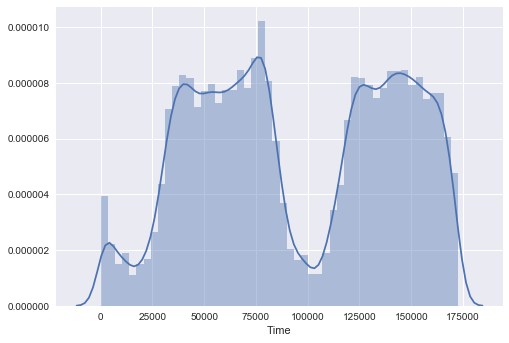

V1 skew: -3.28066730276


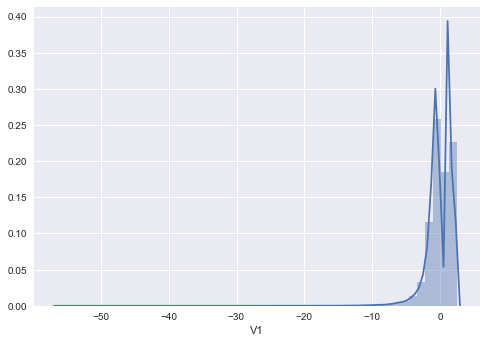

V2 skew: -4.62486557329


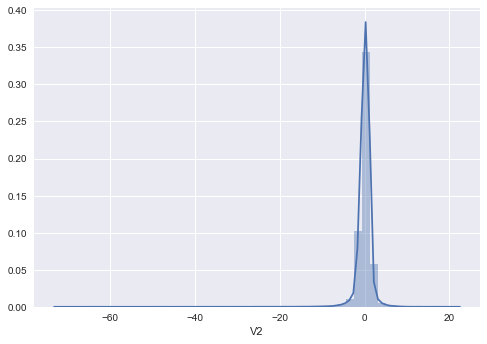

V3 skew: -2.24015544024


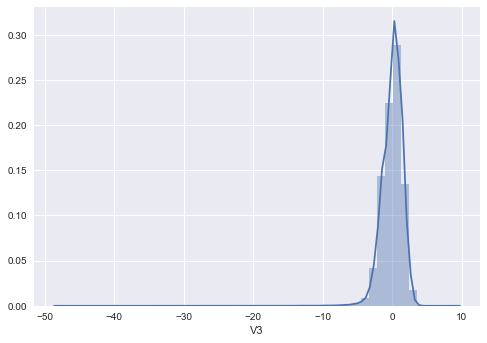

V4 skew: 0.676292097986


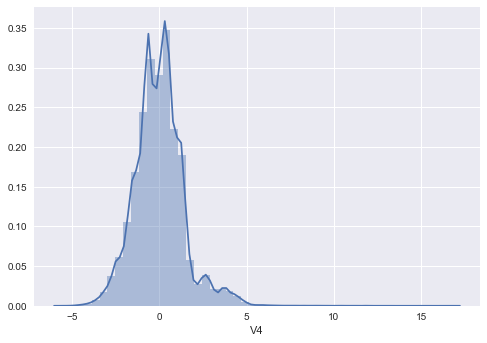

V5 skew: -2.42590149595


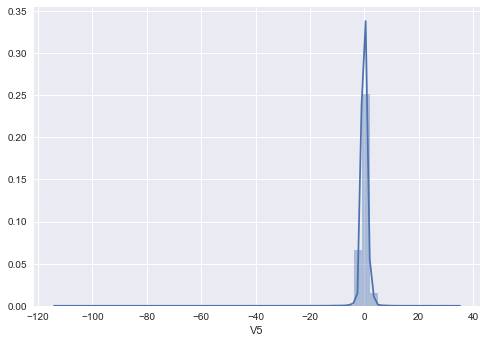

V6 skew: 1.826580665


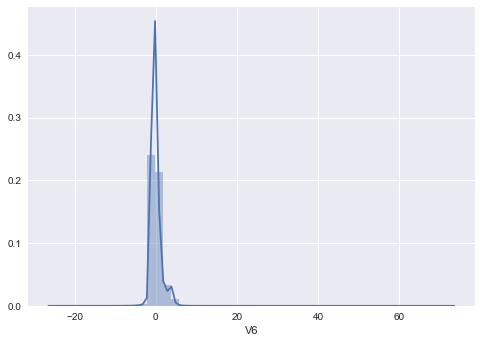

V7 skew: 2.55390741743


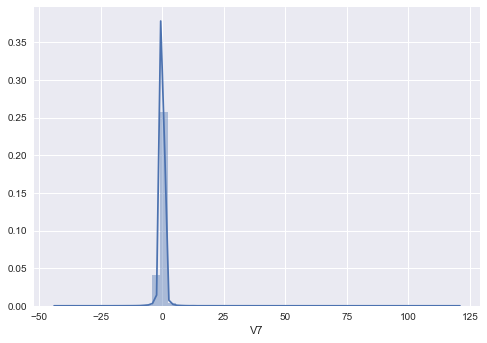

V8 skew: -8.52194419478


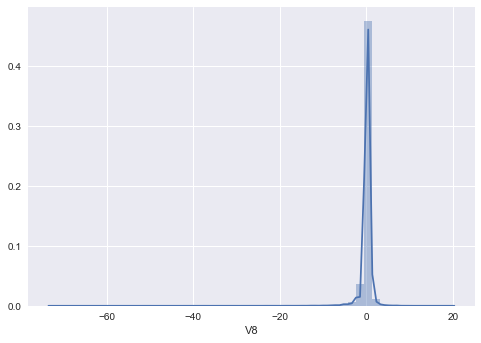

V9 skew: 0.554679771906


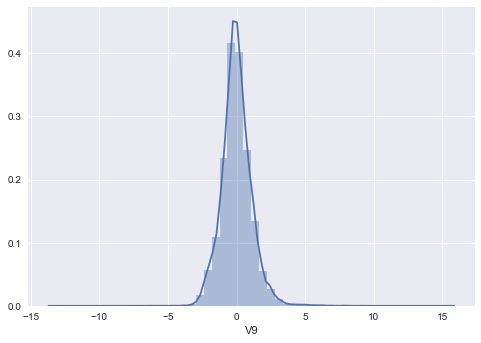

V10 skew: 1.18714058996


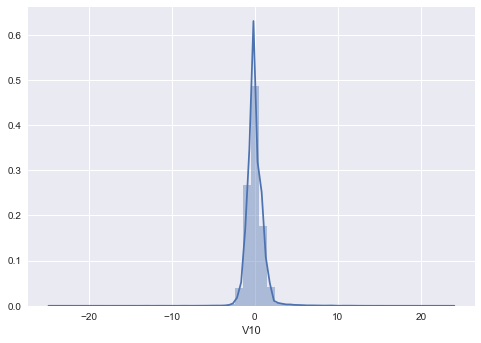

V11 skew: 0.356505855489


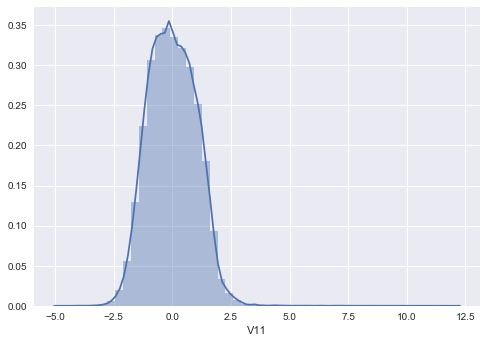

V12 skew: -2.27840093541


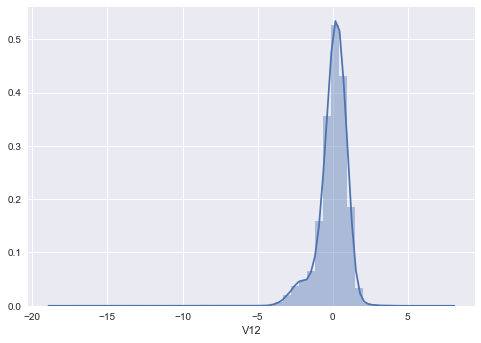

V13 skew: 0.0652334579066


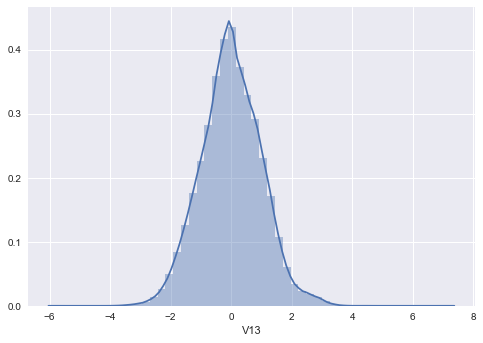

V14 skew: -1.99517584027


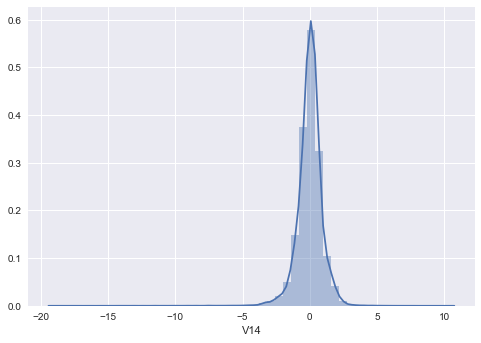

V15 skew: -0.308422982136


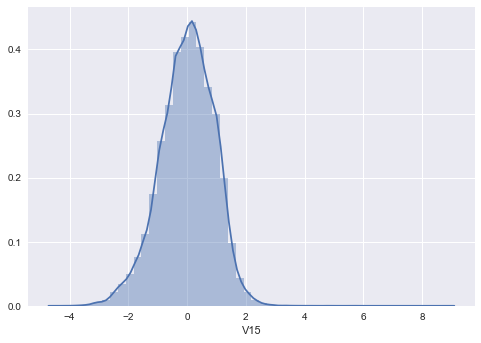

V16 skew: -1.10096627605


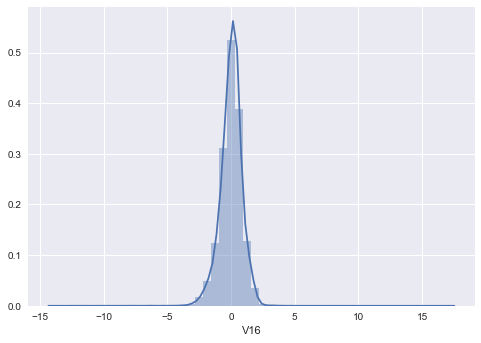

V17 skew: -3.84491447387


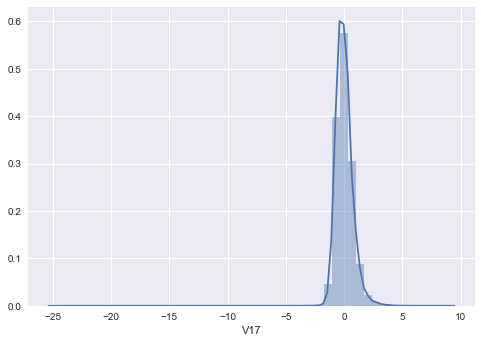

V18 skew: -0.259880268094


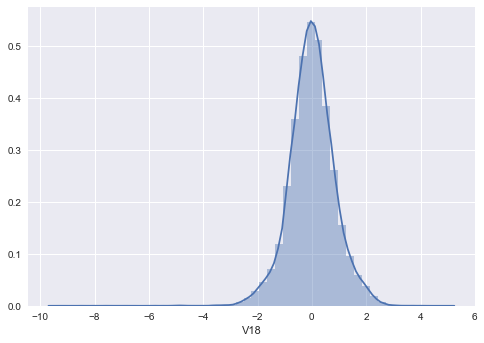

V19 skew: 0.109191759981


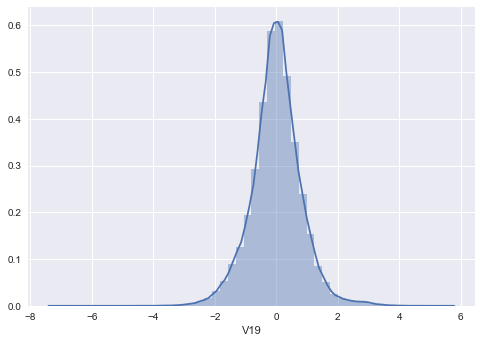

V20 skew: -2.03715529908


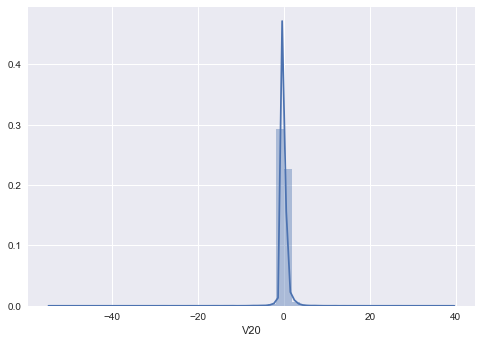

V21 skew: 3.59299119308


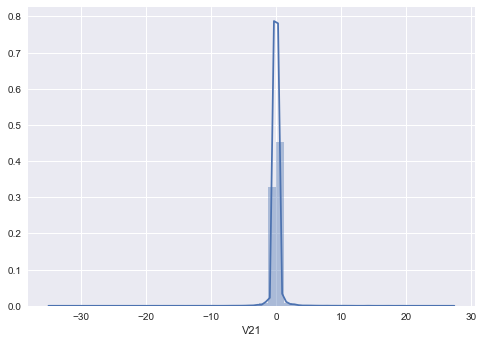

V22 skew: -0.213257622843


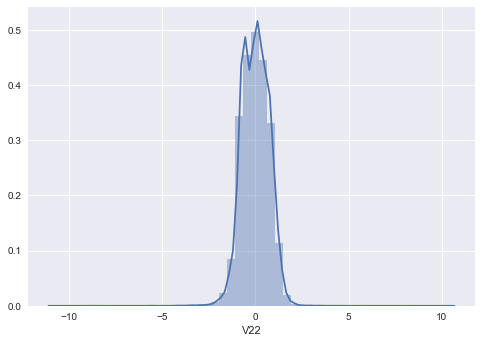

V23 skew: -5.87514034011


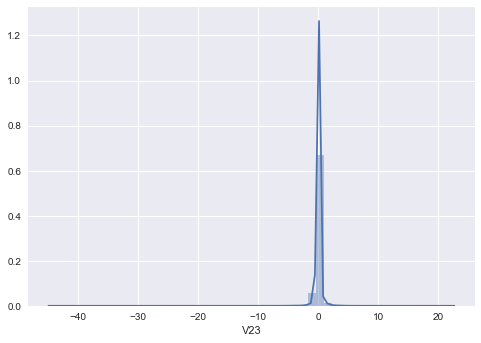

V24 skew: -0.552499301167


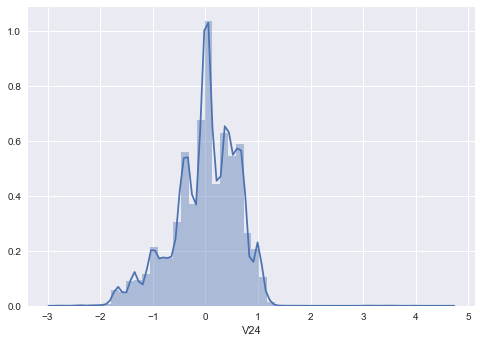

V25 skew: -0.415792590316


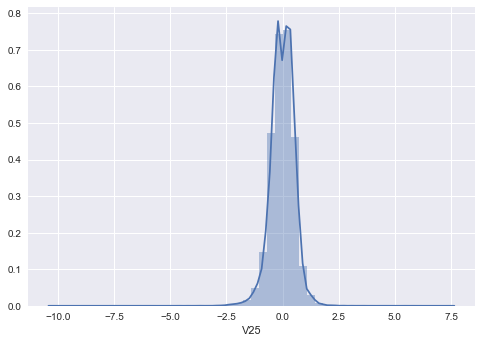

V26 skew: 0.576692617208


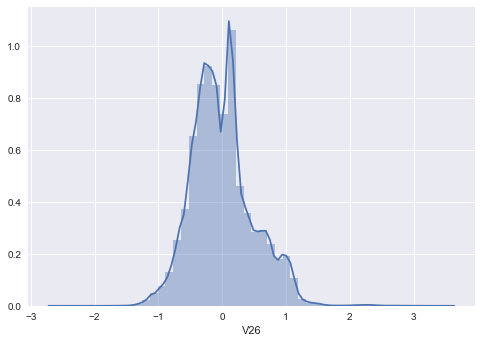

V27 skew: -1.17020894243


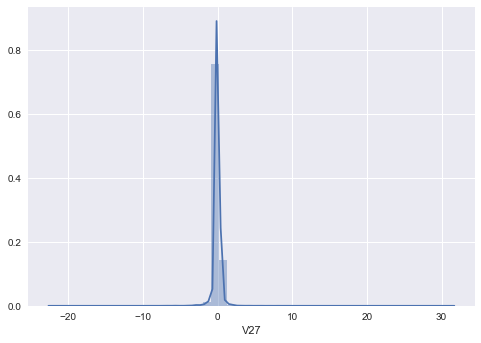

V28 skew: 11.1920911922


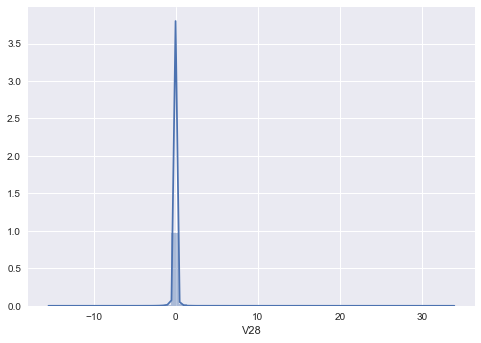

Amount skew: 16.9777244538


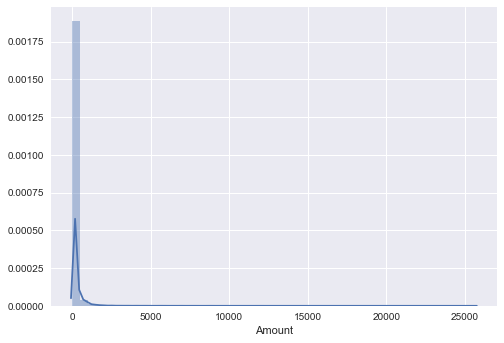

Class skew: 23.9975793106


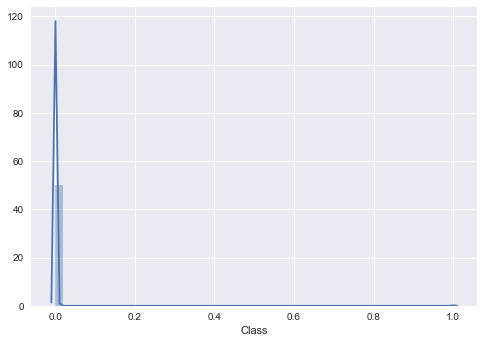

In [6]:
# Understand data distributions
# Q - How do you visualize data with many predictors?
# Q - Many predictors, when should I consider dimension reduction (this already has PCA)
for column in raw_data_df:
    print(column, 'skew:', raw_data_df[column].skew())
    seaborn.distplot(raw_data_df[column])
    plt.show()

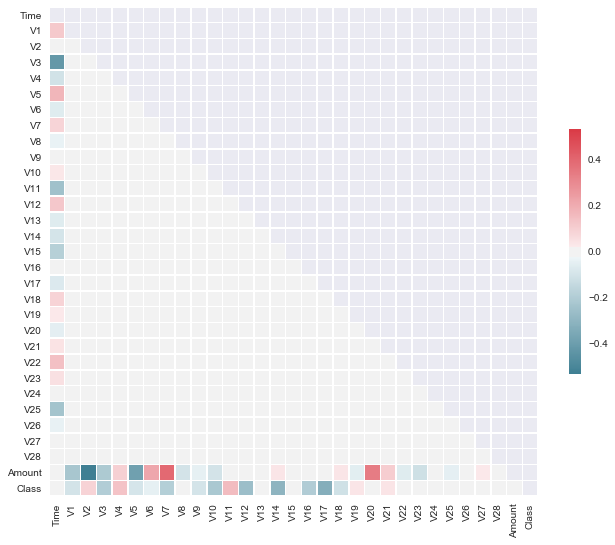

In [61]:
# Visualize correlations

# Compute the correlation matrix
correlations = raw_data_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[numpy.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(correlations, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Step 2
Preprocess data. Common techniques include:
- Scaling, Centering
 - In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard. Scaled data has zero mean and unit variance: deviation.
- Imputation
- Encoding

In [41]:
# Raw data - Subsampling and array creation
subsample_raw_data_df = raw_data_df.sample(n= 30000)
data_df = subsample_raw_data_df.iloc[:,:-1]
target_df = subsample_raw_data_df.iloc[:,-1]

X_raw = data_df.values
y_target = target_df.values
positive_class_ratio = subsample_raw_data_df['Class'].sum()/subsample_raw_data_df['Class'].count()
print('Subsample positive class ratio:', positive_class_ratio)

Subsample positive class ratio: 0.00203333333333


In [50]:
# Scaling raw data
# Q - What data should be scaled? why do we scale our data? Are there 
# times that it is more appropriate than others? For example, is it more 
# important in classification problems than in regression?

X_scaled = preprocessing.scale(data_df.values)
X_scaled_df = pandas.DataFrame(X_scaled,columns=data_df.columns)
X_scaled_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-7.259378e-17,9.000208e-18,-5.684342e-18,-1.302662e-17,7.815970e-18,-7.105427e-18,-5.802766e-18,-6.276461e-18,4.736952e-18,9.000208e-18,...,-1.657933e-18,-4.736952e-19,9.473903e-19,-1.894781e-18,-1.894781e-17,-3.363236e-17,1.752672e-17,-8.052818e-18,8.289665e-19,7.105427e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.995320e+00,-1.551783e+01,-2.477540e+01,-1.781586e+01,-3.640967e+00,-2.256619e+01,-1.516953e+01,-3.318725e+01,-3.156004e+01,-1.220445e+01,...,-2.461090e+01,-2.832298e+01,-1.219982e+01,-2.998918e+01,-4.520520e+00,-8.751110e+00,-3.551357e+00,-2.359602e+01,-2.361902e+01,-3.759885e-01
25%,-8.558374e-01,-4.608300e-01,-3.697558e-01,-5.797957e-01,-6.035355e-01,-5.028023e-01,-5.764041e-01,-4.434732e-01,-1.684451e-01,-5.833446e-01,...,-2.846839e-01,-3.049924e-01,-7.444129e-01,-2.859329e-01,-5.806206e-01,-6.151902e-01,-6.834862e-01,-1.575255e-01,-1.517496e-01,-3.522175e-01
50%,-2.134891e-01,1.740574e-02,3.918576e-02,1.201586e-01,-1.744245e-02,-3.831921e-02,-2.080398e-01,2.929422e-02,1.967703e-02,-3.728207e-02,...,-8.439860e-02,-4.208030e-02,1.106923e-02,-2.833573e-02,6.883177e-02,3.998598e-02,-1.114299e-01,1.468053e-02,3.101734e-02,-2.831755e-01
75%,9.437029e-01,6.691666e-01,4.936554e-01,6.740036e-01,5.309177e-01,4.534554e-01,3.012953e-01,4.573302e-01,2.678028e-01,5.496013e-01,...,1.823417e-01,2.464461e-01,7.275160e-01,2.444176e-01,7.285548e-01,6.746945e-01,5.110392e-01,2.278640e-01,2.208530e-01,-4.808763e-02
max,1.641851e+00,1.225333e+00,1.298852e+01,2.682870e+00,8.568361e+00,2.100273e+01,1.516238e+01,2.471162e+01,1.380550e+01,8.278294e+00,...,2.091023e+01,3.590417e+01,1.147840e+01,2.335566e+01,6.571672e+00,7.760692e+00,6.459176e+00,1.908657e+01,4.466480e+01,3.115196e+01


### Cross-Validation

In [35]:
# Test-Train Split
#X_train, X_test, y_train, y_test = train_test_split(
#    X_data, y_target, test_size = .25, random_state = 42)

# Shuffle split
# Q - What is the benefit/need for shuffle split as opposed to k-fold
# Q - What exactly is random_state
random_split = ShuffleSplit(n_splits = 1, test_size = .25, random_state = 42)
for train_index, test_index in random_split.split(X_scaled):
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y_target[train_index], y_target[test_index]
    


### Modeling

In [38]:
# Let's fit a model. Start with classification

# Q - Is KNN biased in extreme class imbalance situations
# Q - Best ways to visualize model fit
# Q - Best practice to determine hyperparameters
knn = neighbors.KNeighborsClassifier()
knn_model_1 = knn.fit(X_train, y_train)
#1-knn_model_1.score(X_test, y_test) - positive_class_ratio
print('Caution: Model is highly unbalanced. k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

Caution: Model is highly unbalanced. k-NN accuracy for test set: 0.998000
